findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


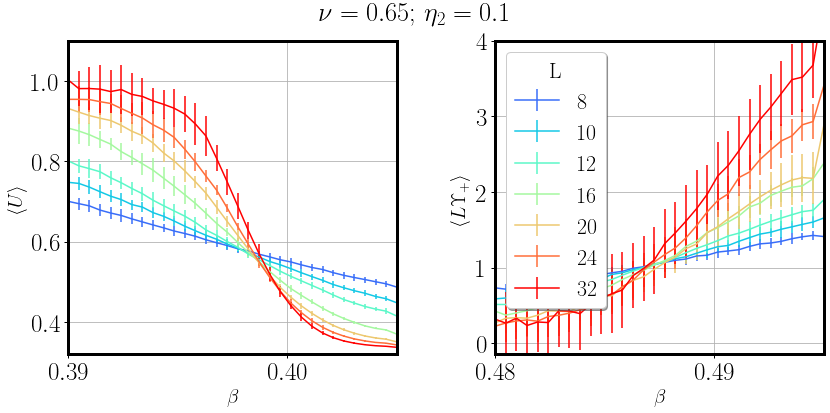

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=0.1
blow=0.48
bhigh=0.495
blow_U=0.39
bhigh_U=0.405
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[1].set_xlim((0.48,0.495))
xticks = np.arange(0.48, 0.495, 0.01)
ax1[1].set_xticks(xticks)
ax1[0].set_xlim((0.39,0.405))
xticks = np.arange(0.39, 0.405, 0.01)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
ax1[0].set_ylim((0.32,1.1))
ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



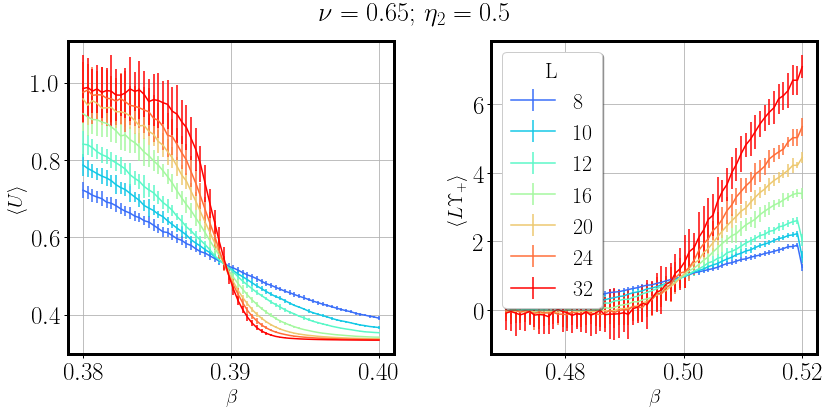

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=0.5
blow=0.47
bhigh=0.52
blow_U=0.38
bhigh_U=0.4
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[1].set_xlim((0.48,0.495))
#xticks = np.arange(0.48, 0.495, 0.01)
#ax1[1].set_xticks(xticks)
#ax1[0].set_xlim((0.39,0.405))
#xticks = np.arange(0.39, 0.405, 0.01)
#ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
#ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



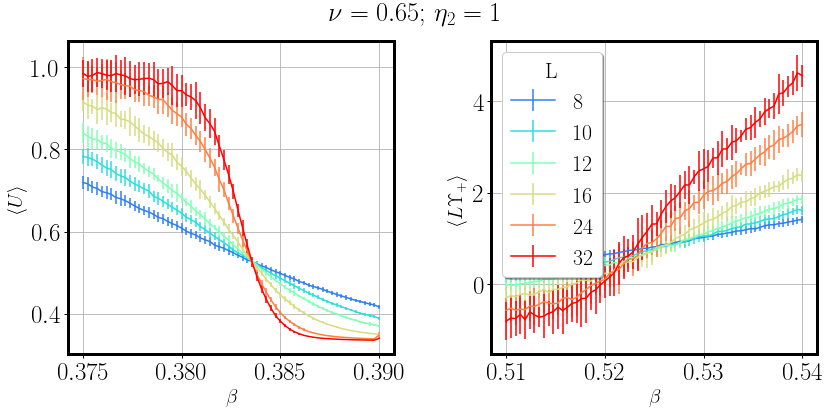

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.51
bhigh=0.54
Hinit=0

blow_U=0.375
bhigh_U=0.39
Hinit_U=1
nMAX=30

LLIST=[8, 10,12, 16, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[1].set_xlim((0.48,0.495))
#xticks = np.arange(0.48, 0.495, 0.01)
#ax1[1].set_xticks(xticks)
#ax1[0].set_xlim((0.39,0.405))
#xticks = np.arange(0.39, 0.405, 0.01)
#ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
#ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit_U))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


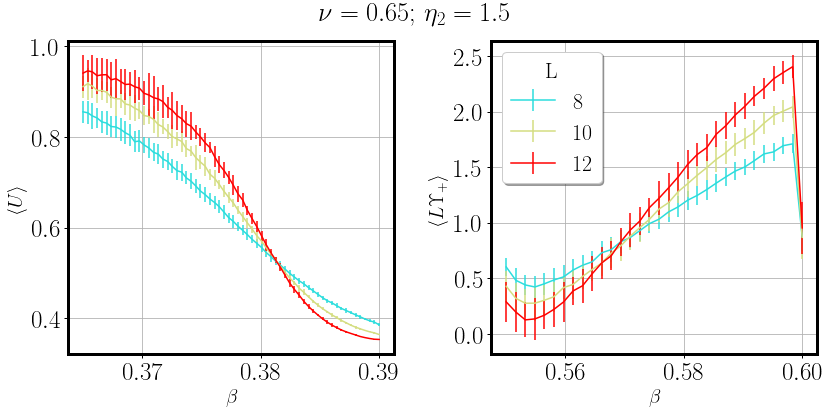

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1.5
blow=0.55
bhigh=0.6
blow_U=0.365
bhigh_U=0.39
Hinit=1
nMAX=30

LLIST=[8, 10,12]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[1].set_xlim((0.48,0.495))
#xticks = np.arange(0.48, 0.495, 0.01)
#ax1[1].set_xticks(xticks)
#ax1[0].set_xlim((0.39,0.405))
#xticks = np.arange(0.39, 0.405, 0.01)
#ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
#ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



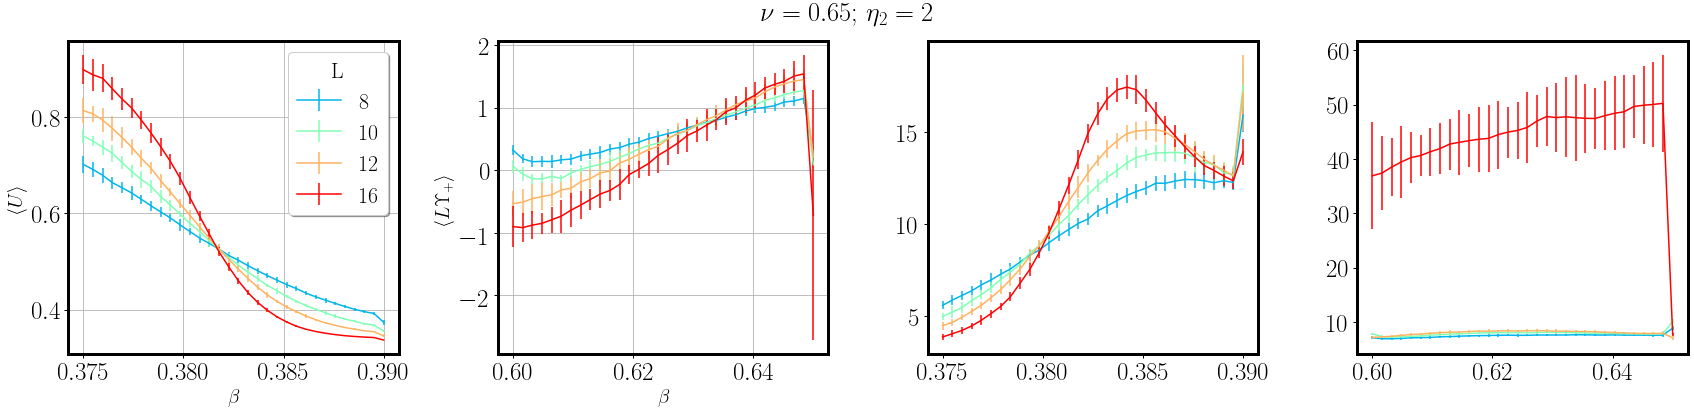

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=2
blow=0.6
bhigh=0.65
blow_U=0.375
bhigh_U=0.39
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(24,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[1].set_xlim((0.48,0.495))
#xticks = np.arange(0.48, 0.495, 0.01)
#ax1[1].set_xticks(xticks)
#ax1[0].set_xlim((0.39,0.405))
#xticks = np.arange(0.39, 0.405, 0.01)
#ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
#ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]   

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv_2= data_Cv[1]
    err_Cv_2= data_Cv[2]   

    beta_J, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta_J, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_U, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[3].errorbar(beta, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



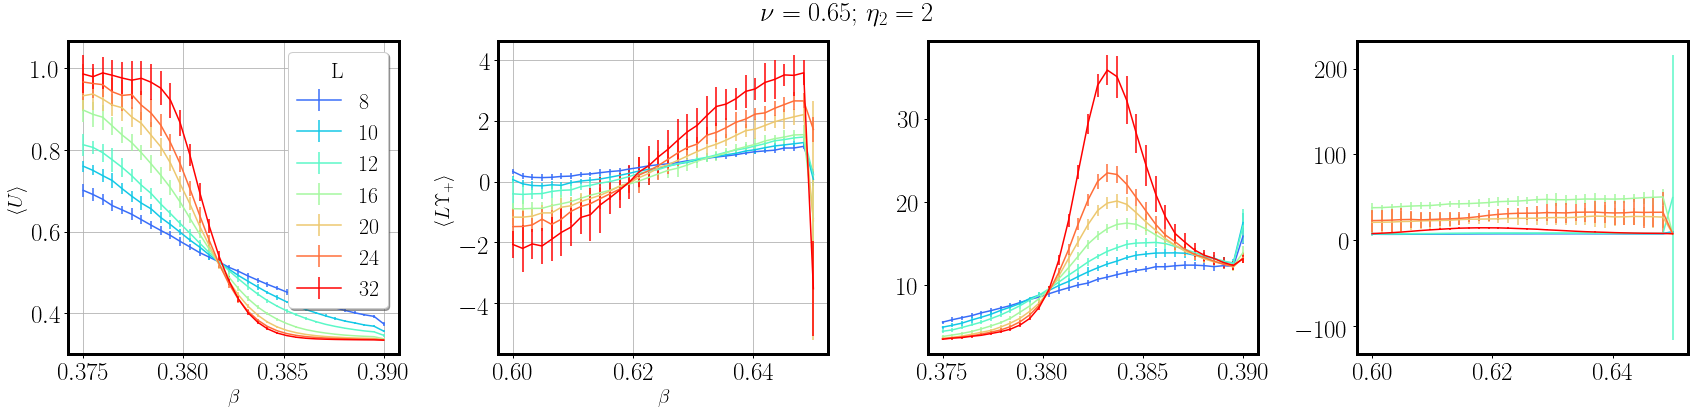

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=2
blow=0.6
bhigh=0.65
blow_U=0.375
bhigh_U=0.39
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(24,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[1].set_xlim((0.48,0.495))
#xticks = np.arange(0.48, 0.495, 0.01)
#ax1[1].set_xticks(xticks)
#ax1[0].set_xlim((0.39,0.405))
#xticks = np.arange(0.39, 0.405, 0.01)
#ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
#ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]   

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv_2= data_Cv[1]
    err_Cv_2= data_Cv[2]   

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta_U, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_U,  usecols=(0,1,2), unpack=True )

    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    #ax1[0].errorbar(beta_U, L*J_diff, yerr=L*err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_U, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[3].errorbar(beta, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



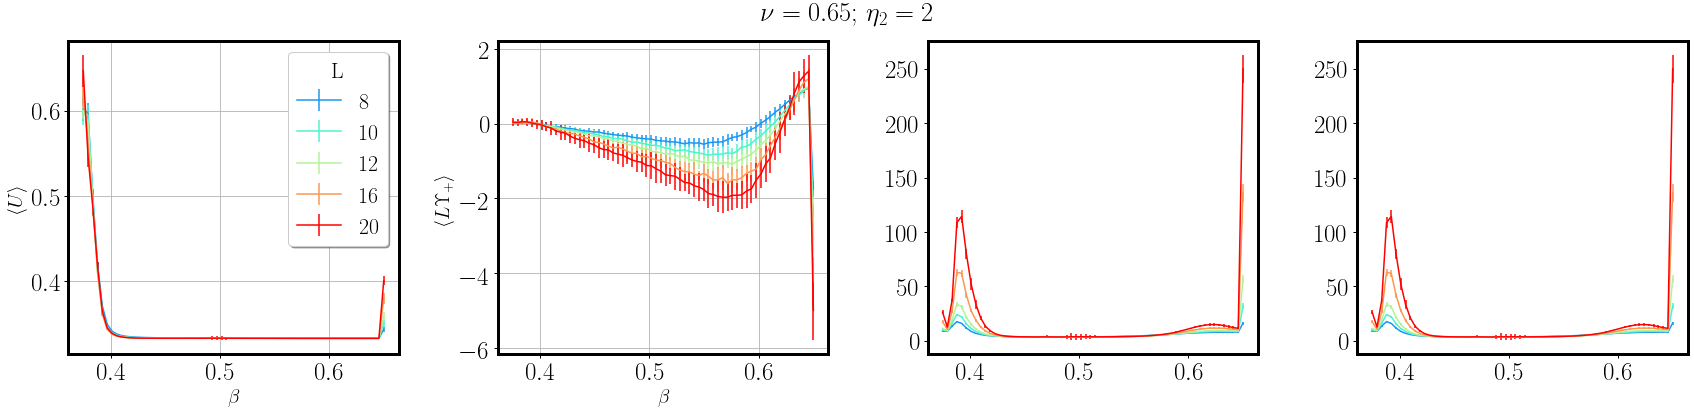

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=2
blow=0.375
bhigh=0.65
blow_U=0.375
bhigh_U=0.65
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(24,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
#ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[1].set_xlim((0.48,0.495))
#xticks = np.arange(0.48, 0.495, 0.01)
#ax1[1].set_xticks(xticks)
#ax1[0].set_xlim((0.39,0.405))
#xticks = np.arange(0.39, 0.405, 0.01)
#ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
#ax1[1].set_ylim((-0.15,4))
#ax1[2].set_ylim((-0.15,60))
#ax1[2].set_ylim((2.5,15))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]   

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv_2= data_Cv[1]
    err_Cv_2= data_Cv[2]   

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_U, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[3].errorbar(beta, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )




findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


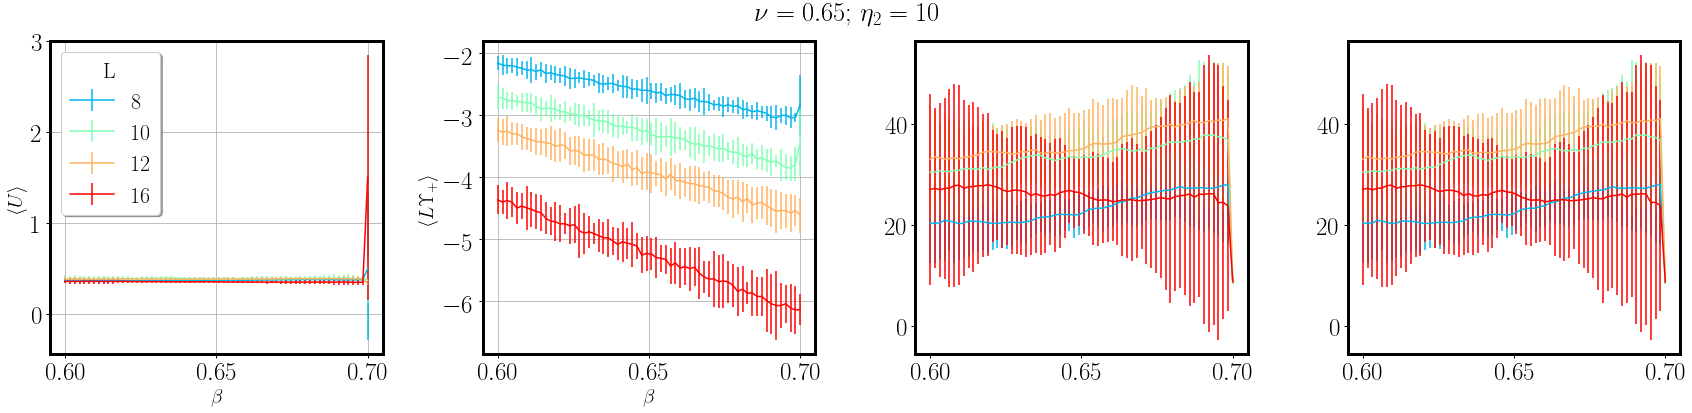

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=10
blow=0.6
bhigh=0.7
blow_U=0.6
bhigh_U=0.7
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(24,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
#ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")

ax1[0].grid()
ax1[1].grid()
#ax1[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]   

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv_2= data_Cv[1]
    err_Cv_2= data_Cv[2]   

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_U, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[3].errorbar(beta, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )

